In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_diabetes
from sklearn import linear_model

import numpy as np

# Linear Algebra Review
TODO
Matrices, transposes, inverses, spans, subspace / column space, matrix multiplication

# Orthogonal Projection
## Orthogonal Complements
If $W$ is a subspace of $\R^n$, then its **orthogonal complement** is the subspace:  
$W^{\perp} = \{\vec{v} \in \R^n| \vec{v} \cdot \vec{w} = 0\ for\ all\ \vec{w}\ in\ W\}$ 
- Recall that two vectors are orthogonal, or perpendicular, if their dot product is 0 ( because the dot product can be computed as $|\vec{v}||\vec{w}| \cos \theta$, where $\theta$ is the angle between the vectors, and if that equation is set equal to 0, then solving for theta yields $\theta = \cos^{-1}0 = 90^{\degree}$).  
- Thus, if we have some subpsace $W$ which consists of the vectors $\vec{v}$, then the orthogonal complement of this subspace is another subspace, $W^{\perp}$, where all its vectors $\vec{w}$ are orthogonal with the vectors in $W$.  

We can use this concept to define the orthgonal complement of a column space.  
If $A$ is a matrix and $W = Col(A)$, then $W^{\perp} = Nul(A^T)$ (ie, the null space of A transposed).  
Since column spaces are also **spans**, we can rephrase:  
- Let $\vec{v_1}, \vec{v_2}, ..., \vec{v_n}$ be vectors in $\R^n$, and let $W = Span\{ \vec{v_1}, \vec{v_2}, ..., \vec{v_n} \}$, then:  
- $W^{\perp}$ = {all vectors orthogonal to each $\vec{v_1}, \vec{v_2}, ..., \vec{v_n}$} = $Nul((\vec{v_1}, \vec{v_2}, ..., \vec{v_n})^T)$  

We can use this and solve for the orthogonal complement of a span by solving a system of linear equations, check out examples here: 
https://textbooks.math.gatech.edu/ila/orthogonal-complements.html  
The basic formula is:  
1. Find the null-space of the given span using row reduction.    
1. Write in parametric form.  
1. Use this identify the the orthogonal complement of the span.  
An example:  
Find all vectors orthogonal to (column) vector $v = (1, 1, -1)^T$.  
Create matrix $A$ = ( -- $v$ --) = (1, 1, -1).  
Find the null space by row reducing. This matrix is already in RREF.  
The solution set is thus $x_1 = -x_2 + x_3$. Writing in parametric form we get $x = x_2 (-1, 1, 0)^T + x_3 (1, 0, 1)^T$.  
That gives us $Span((-1, 1, 0)^T, (1, 0, 1)^T)$ which is a plane.  

In [3]:
vec1 = np.array([1, 7, 2])
vec2 = np.array([-2, 3, 1])
# to plot the span as a plane, we need a normal vec to the plane
normal = np.cross(vec1, vec2)
# and we solve for plane eq given that (r - r0) * n = 0 (picl vec1 as r0)
# ==> (<x,y,z> - <x0, y0, z0>) . (a, b, c) = 0
# ==> a(x-x0) + b(y-y0) + c(z-z0) = 0
# ==> ax + by + cz - (a*x0 + b*y0 + x*z0) = 0
# ==> ax + by + cz + d = 0
# solve for d: d = -(ax + by + cz)
d = -vec1.dot(normal)

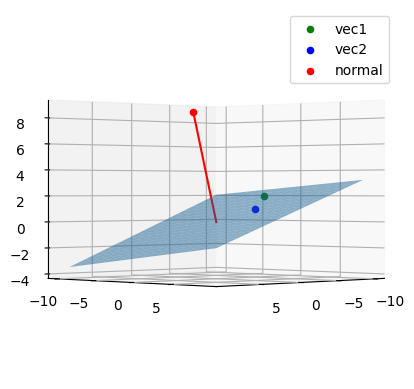

In [4]:
# create x,y
xx, yy = np.meshgrid(range(-10, 10), range(-10, 10))

# calculate corresponding z at any given x,y (need z = f(x,y))
# ax + by + cz + d = 0 ==> z = -(ax + by + d) / c 
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xx, yy, z, alpha = 0.5)
ax.scatter(vec1[0], vec1[1], vec1[2], color="green", label="vec1")
ax.scatter(vec2[0], vec2[1], vec2[2], color="blue", label="vec2")
ax.scatter(normal[0]/2, normal[1]/2, normal[2]/2, color = "red", label="normal")
ax.plot([0, normal[0]/2], [0, normal[1]/2], [0, normal[2]/2], color="red") #rescale to make smaller

ax.view_init(0, 45, None)
plt.legend()
plt.show()
# vec1 and vec2 are on our plane representation of their column space, and the
# orthogonal complement is the red line, which is also the normal vector of the 
# plane we plotted.
# Interactive: https://www.geogebra.org/3d/wd2czpwe

## Projection
Let $W$ be a suspace of $\R^n$ and $x$ be a vector in $\R^n$, then we denote the closest vector to $x$ on $W$ by $x_W$.  
- Saying that $x_W$ is the closest vector to $x$ on $W$ is equivalent to saying that the difference between $x$ and $x_W$ is orthogonal to (the vectors in) $W$. That is, the vector on $W$ that is closest to $x$ is always the vector on $W$ that lies in such a way that $(x - x_W)$ is perpendicular to $W$.    
<img src="assets/la_closestvec.png" width="300" height="200">    
-  Above we can see vector $x$ outside of subsapce $W$, and its closest vector on $W$ is $x_W$. The difference between these vectors $(x - x_W)$ is itself a vector, and it is orthogonal to $W$. We will come to know this orthogonal vector as the "residual" vector.  

As we learned above, subspace $W$ has an **orthogonal complement** called $W^{\perp}$. Thus, $x$ also has a "closest vector" on that subspace, $x_{W^{\perp}}$.  
Again, this closest vector is the vector on $W^{\perp}$ such that the difference between $x$ and $x_{W^{\perp}}$, $(x - x_{W^{\perp}})$, is orthogonal to $W^{\perp}$.      
We already know what this closest vector is: $(x - x_W)$. We know this vector is orthogonal to $W$ and is thus in $W^{\perp}$.   
So if $x_{W^{\perp}} = x - x_W$, then we by rearranging this equation we can decompose $x$ into two components:  
$x = x_W + x_{W^{\perp}}$  
- This is the **orthogonal decomposition** of $x$ with respect to $W$.  
- The closest vector to $x$ on $W$, $x_W$, is called the **orthogonal projection** of $x$ onto $W$.  
- The distance from $x$ to $W$ is the magnitude of $x_{W^{\perp}}$: $||x_{W^{\perp}}||$ = $||(x - x_W)||$  

For example, if $x$ is <1, 2, 3> and $W$ is the xy-plane (so $W^{\perp}$ is the z-axis), then $x$ can be "reached" by adding "tail to tip" the vector $x_W$ which extends from the origin to the point in the xy-plane below x, <1, 2, 0>, with the vector $x_{W^{\perp}}$ which extends vertically from the xy-plane to $x$, <0, 0, 3>. In other words, we decompose x into a **horizontal** and **vertical** component.  
        <img src="assets/la_orthog_decomp.png" width="200" height="200">  

How do we compute $x_W$ - the orthogonal projection of $x$ onto $W$? We solve the following system of linear equations, where $A$ is the matrix whose column space is $W$ (ie, $Col(A) = W$) and $c$ is the unkown vector:  
$A^TAc = A^Tx$  
- This can be solved through row-reduction. Proof in Interactive Linear Algebra:
- Since $x_W$ lies in $W = Col(A)$ by definition (ie, $x_W$ is spanned by $Col(A)$), then there is a vector $c$ in $R^n$ for which $Ac = x_W$, since some linear combination of A's column vectors can reach $x_W$. Thus the vector $x - x_W == x - Ac$ lies in $W^{\perp}$ (it is the "residual" vector as above), and $W^{\perp} = Nul(A^T)$ (as shown in the orthogonal complements section). 
- In other words, $x-Ac$ is orthogonal to each column $a_j$ of $A$, so that $a_j \cdot (x-Ac) = 0$, and thus $a_j^T \cdot (x-Ac) = 0$. Since each $a_j^T$ is a row of $A^T$, then $A^T (x - Ac) = 0$, which, after distributing, can be rewritten as $A^TAc = A^Tx$.    
- This means that this is a "consistent" system of equations meaning that if $c$ is any solution to the system of equations, then $x_W = Ac$ 

Side note - orthogonal projection onto a line:  
- If we wish to project vector $x$ onto line $L = Span(u)$, we can use our equation $A^TAc = A^Tx$ which becomes $u^Tuc = u^Tx$.  
- However, since $u$ is a vector this simplifies to $(u \cdot u)c = u \cdot x$ so that $c = \frac{u \cdot x}{u \cdot u}$
- As $x_W = Ac$, so does $x_L = u \cdot c$ and so $x_L =  \frac{u \cdot x}{u \cdot u} u$
- You may recognize this formula as the "vector projection" of x onto u, sometimes written as $proj_{u}x = \frac{u \cdot x}{|u|^2}u$ where $|u|$ is the magnitude of $u$.



When solving for $x_W$, we may have some vector $x$ which we want to orthogonally decompose with respect to some subspace, $W$. We want to write $W$ as the column space of a matrix $A$ and then calculate the matrix $A^TA$ and vector $A^Tx$, before plugging these results into $A^TAc = A^Tx$ to solve for $c$ (since, $x_W = Ac$).   
- [Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/projections.html) has some great examples of how to solve these kinds of problems.  

It turns out that if we start with a **basis** for $W$, so that the columns of our matrix $A$ are **linearly independent**, then $A^TA$ is invertible. This simplifies the calculation of $x_W$, because:  
- We can now rewrite $A^TAc = A^Tx$ to solve for $c$, so $c = (A^TA)^{-1}A^Tx$.
- Since we know $x_W = Ac$, then we add one more matrix multiplcation by $A$ and we have the following key formula:  

**Calculating the Orthogonal Projection of x onto W when A has linearly independent columns**, for W = Col(A):    
$x_W = A(A^TA)^{-1}A^Tx$  
- This requires that, if $W$ is a subspace of $\R^n$ with basis $v_1, v_2, ..., v_n$, then $A$ is a matrix whose columns are $v_1, v_2, ..., v_n$.  


**Projection / Hat Matrix**  
- Recall that $x_W$ is the orthogonal projection of $x$ onto $W$. 
- Therefore, the matrix $A(A^TA)^{-1}A^T$ does the work of projecting $x$ onto $W$, and is thus referred to as the **projection matrix**.  
- As we will soon see, sometimes we write $x_W$ as $\hat{x}$, leading us to refer to this matrix as the **hat matrix** of **H** since it "puts the hat" on the vector we are projecting.  
- This matrix is a linear transformation (a composition of linear transformations), and thus we can think of the projection $x_W$ as a function of $x$, ie, $x_W = T(x)$.  

Selected Properties of the projection matrix:    
- $T(x) = x$ if and only if $x$ is in $W$
    - In other words, $x_W = x$ if $x$ is in $W$ - this is intuituve since we are trying to orthogonally project $x$ onto the subspace it is already in.  
- $T(x) = 0$ if and only if $x$ is in $W^{\perp}$  
    - In other words, $x_W = 0$ if $x$ is in $W^{\perp}$ - here, we are essentially trying to project $x$ onto the subspace that is the orthogonal complement to the subspace that contains $x$.  



_Example:_   
let $W = Span{(1, 0, -1)^T, (1, 1, 0)^T}$ and $x = (1, 2, 3)^T$
Then we can write $A^TA = A^Tx$.  
$A^TA$ = 
```
[2 1]
[1 2]
```
and $A^Tx$ =  
```
[-2]
[ 3]
```
Form augmented matrix and row-reduce:  
```
[2 1 | -2] -RREF--> [1 0 | -7/3] ---> c = [-7/3]
[1 2 |  3]          [0 1 |  8/3]          [ 8/3]
```
Thus, $x_W = Ac$ = [1/3, 8/3, 7/3] = [0.333, 2.666, 2.333]

Alternatively we can calculate the projection matrix, which will be easier for larger inputs.  

In [6]:
A = np.array([[1, 1],
              [0, 1],
              [-1, 0]])
x = np.array([1, 2, 3]).T # column vec

Proj = A @ np.linalg.inv(A.T @ A) @ A.T
x_W = Proj @ x
x_W

array([0.33333333, 2.66666667, 2.33333333])

## Orthogonal Sets
Quick facts:  
- a set of (nonzero) vectors {$u_1, u_2, ..., u_m$} is **orthogonal** if $u_i \cdot u_j = 0$ whenever $ i \not= j$
    - that is, any combination of two different vectors in the set is a combination of orthogonal vectors, and thus their dot product is 0.  
- the set is **orthonormal** if it is orthogonal and in addition $u_i \cdot u_i = 1$ for all $i$.   
- any orthogonal set can be made orthonormal if each vector is converted to a _unit vector_ (recall, this can be done by dividing a vector by its magnitude).  
- since an orthogonal set is linearly independent, it is also the basis for its span.  

### Using Orthogonal Sets for Orthogonal Projection
Working with orthogonal sets gives us a simple formula for the orthogonal projection of a vector.  
Recall that the orthogonal projection of $x$ on a line $L$ spanned by vector $u$ is $x_L =  \frac{u \cdot x}{u \cdot u} u$.  
Therefore, if {$u_1, u_2, ..., u_m$} is an orthogonal set of vectors (and thus also the basis for its span, $W$), then the orthogonal projection of $x$ onto $W$ is given by this **projection formula**:  
$x_W =  \frac{x \cdot u_1}{u_1 \cdot u_1} u_1 + \frac{x \cdot u_2}{u_2 \cdot u_2} u_2 + ... +  \frac{x \cdot u_m}{u_m \cdot u_m} u_m$.  

Since $L_i = Span(u_i)$, this could be written $x_W = x_{L_1} + x_{L_2} + ... + x_{L_m}$ - in other words, for an orthogonal basis the projection of $x$ onto $W$ is the _sum of the projections onto the lines spanned by the basis vectors_.  

Recall from above that if $x$ is in $W$ then $x_W = x$. Therefore, if we have a subspace $W$ with an orthogonal basis {$u_1, u_2, ..., u_m$} and $x$ is a vector in $W$, then we can write $x$ as a linear combination of basis vectors:  
$x = x_W = \frac{x \cdot u_1}{u_1 \cdot u_1} u_1 + \frac{x \cdot u_2}{u_2 \cdot u_2} u_2 + ... +  \frac{x \cdot u_m}{u_m \cdot u_m} u_m$.  

### Orthonormal sets and projection
_Linear Algebra and its Applications, pg. 353._  
- If {$u_1, ..., u_m$} is an orthonormal basis for a subspace $W$ of $\R^n$, then the orthogonal projection of $x$ onto $W$ simplifies (since $u_m \cdot u_m = 1$) to 
$x_W = (x \cdot u_1)u_1 + ... + (x \cdot u_m)u_m$.  
- So if $U$ = [$u_1, ..., u_m$], then $x_W = UU^Tx$ for all $x$ in $\R^n$  
    - since the above formula can be re-written so $x_W = (x \cdot u_1)u_1 + ... + (x \cdot u_m)u_m = (u_1^Tx)u_1 + ... + (u_m^Tx)u_m$, so that the "weights" in the parentheses are the elements of $U^Tx$, and this matrix is multiplied by $U$, confirming that $x_W = UU^Tx$.  



### The Gram-Schmidt Process  
The work above demonstrates that orthogonal projections are easier to compute when we have an orthogonal basis for a subspace. Therefore, it would be nice if it were possible to compute an orthogonal basis for any subspace.  
Let {$v_1, v_2, ..., v_m$} be a basis for subspace $W$ in $\R^n$.  
We can use the following Gram-Schmidt process:  
1. Define $u_1 = v_1$.  
1. Define $u_2 = (v_2)_{Span(u_1)^{\perp}}$ = $v_2 - \frac{v_2 \cdot u_1}{u_1 \cdot u_1} u_1$  
    - This basically means "$u_2$ is equal to the orthogonal projection of $v_2$ onto the orthogonal complement of the span of $u_1$"  
    - In earlier formulas, we would have written $W = Span(u_1)$, its orthogonal complement as $W^{\perp}$, so that we could have written $u_2 = (v_2)_{W^{\perp}}$
1. Define $u_3 = (v_3)_{Span(u_1, u_2)^{\perp}}$ = $v_3 - \frac{v_3 \cdot u_1}{u_1 \cdot u_1} u_1 - \frac{v_3 \cdot u_2}{u_2 \cdot u_2} u_2 $  
...  

&nbsp;&nbsp;&nbsp; m. Define $u_m = (v_m)_{Span(u_1, u_2, ..., u_m)^{\perp}}$ = $v_m - \Sigma_{i=1}^{m-1} \frac{v_m \cdot u_i}{u_i \cdot u_i} u_i$  
Then {$u_1, u_2, ..., u_m$} is an orthogonal basis for the same subspace $W$.   

The proof for this process can be read in [Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/orthogonal-sets.html). Essentially, one can prove that each $u_i$ is in $W$ and nonzero, and that the set of all $u_i$ is an orthogonal set. Therefore, we can use the projection formula to calculate $(v_m)_{Span(u_1, ..., u_{m-1})^{\perp}}$ - ie, the orthonal projection of $v_m$ onto the orthogonal complement of the span of the set of $u_i$.   
- Geometrically, once we have $u_1$, we replace $v_2$ by the part that is orthogonal to "$W_1$", where $W_1$ is the span of $u_1$ and hence also the span of $v_1$  
- Once we have $u_1$ and $u_2$, we replace $v_3$ with the part that is orthogonal to $W_2 = Span(u_1, u_2) = Span(v_1, v_2)$    
<img src="assets/la_gramschmidt.png" width="200" height="200">  
- Above, we can see that $u_3$ is equivalent to $(v_3 - (v_3)_{W_2^{\perp}})$, the residual vector after we project $v_3$ onto $W_2$.  

You can use the Gram-Schmidt process to produce an orthogonal basis from any spanning set. If we started with a spanning set that was linearly dependent, so that for some vector in the starting span $u_i = 0$, we simply throw away $u_i$ and continue with the procedure.  

[Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/orthogonal-sets.html) suggests that it is worth the time to run the Graham-Schmidt process to produce an orthogonal basis if you have to compute projections of many vectors onto the same subspace.  
This process is also related to QR decomposition, which is a common technique used for computing linear regression.  
https://cran.r-project.org/web/packages/matlib/vignettes/gramreg.html 


_Example:_ find an orthogonal basis {u1, u2, u3} for $W$, the subspace spanned by vectors v1, v2, v3:

In [7]:
v1 = np.array([1,1,0])
v2 = np.array([1,1,1])
v3 = np.array([3,1,1])
def vector_project(v, u):
    # project vector v onto basis vector u
    return (np.dot(v, u) / np.dot(u, u)) * u

# gram-schmidt process
u1 = v1
u2 = v2 - vector_project(v2, u1)
u3 = v3 - vector_project(v3, u1) - vector_project(v3, u2)

for i, u in enumerate([u1, u2, u3]):
    print(f"u{i} = <{', '.join([str(int(n)) for n in u])}>")
# confirm {u1, u2, u3} is an orthogonal basis for W
print("Orthogonal basis?:",
    (np.dot(u1, u2), np.dot(u1, u3), np.dot(u2, u3)) == (0., 0., 0.)
)


u0 = <1, 1, 0>
u1 = <0, 0, 1>
u2 = <1, -1, 0>
Orthogonal basis?: True


# Least Squares  
Linear Algebra is broadly concerned with systems of linear equations, "$Ax = b$" (see [Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/overview.html) for an overview).  
In general, we wish to solve for the (vector of) unkowns, $x$.  
In the sciences and social sciences, $x$ might be a vector of parameters that model how some inputs, (the columns of) $A$, are linearly combined to produce an output, $b$.   
We can use data to calculate these parameters, but that suggests that we might be working with messy, real-world numbers and trying to model some process that is noisy or that we do not fully understand. Therefore, $Ax = b$ may not have an exact solution.     
In this scenario, we can use least-squares methods to find the _best approximate solution_ for the system.  

## Least-Squares Solution
If $A$ is an $m \times n$ matrix and $Ax = b$ is an inconsistent matrix equation, then the **least-squares solution**, or _best approximate solution_, to the equation is a vector $\hat{x}$ in $\R^n$ such that $dist(b, A\hat{x}) \le dist(b, Ax)$ for all other vectors $x$ in $\R^n$.  
- The distance between two vectors, $dist(v, w) = |v - w|$. Intuitively, a vector $v$ minus a vector $w$ yields the vector that points from $w$ to $v$ ($v$ is the terminal point). Thus, the magnitude of this vector is the distance between the two vectors.  
- Recall, magnitude of a vector $x = <x_1, x_2, x_3> = \sqrt(x_1^2 + x_2^2 + x_3^2)$  
So a least-squares solution **minimizes the sum of squares of the differences between the entries of $A\hat{x}$ and b**.  
- That is, it solves $Ax = b$ as _closely_ as possible.  
    - Above, we use distance to convey that the vector $b$ is closer to $A\hat{x}$ than to $Ax$ for other $x$.  
- "The sum of squares of the differences" is also called the **Residual Sum of Squares** - the "residual vector" being the vector $v-w$ in the example above.  

To do so, least-squares relies on the fact that _closest vector_ of the form $Ax$ to $b$ is the orthogonal projection of $b$ onto $Col(A)$:  
- Recall that a matrix equation $Ax = b$ has a solution if and only if $b$ is in the span of the columns of $A$ - this is intuitive because some linear combination of $A$'s columns, where the components of $x$ are the coefficients, must be able to "reach" the vector $b$.  
- Recall that the column space of $A$ is the set of all $c$ such that $Ax = c$ is consistent - again, this is intuitive: the "column space" is the subspace where all vectors in it can be "reached" by the columns of $A$.  
- This also means that $Col(A)$ is the set of vectors of the form $Ax$.  
- Hence, the _closest vector_ of the form $Ax$ to the vector $b$ is the orthogonal projection of $b$ onto $Col(A)$.  
    - Recall from **orthogonal projection**, that saying $x_W$ is the _closest vector_ to $x$ on $W$ is equivalent to saying that the difference between $x$ and $x_W$, $(x - x_W)$, is orthogonal to (the vectors in) $W$. Recall $x_W$ is the "orthogonal projection" of $x$ onto $W$. 
    - Similarily, the closest vector to $b$ on $Col(A)$ is the orthogonal projection of $b$ onto $Col(A)$, or $b_{Col(A)}$

Thus, a least-suares solution of $Ax = b$ is a solution $\hat{x}$ of the consistent equation $Ax = b_{Col(A)}$.  
- If $Ax = b$ is consistent, then $b_{Col(A)} = b$ so the least-squares solution is the same as the usual solution.  
    - (Recall, that the $x_W = x$ if $x$ is in $W$, since this implies we are orthogonally projecting $x$ onto the subspace $W$ that it is already in.)  
- If $Ax=b$ is inconsistent, then $\hat{x}$ is the best approximate solution.  

Note that if we have solved for $\hat{x}$, and $v_1, ..., v_n$ are the columns of $A$, then $A\hat{x} = \hat{x}_1 v_1 + ... + \hat{x}_n v_n = b_{col(A)}$.  
- If we define $y = b_{Cola(A)}$ and $\hat{\beta} = \hat{x}$, this looks just like a typical linear regression formula $y = \beta_1 + \beta_2 v_2$, where $v_1 = 1$

Geometrically:    
<img src="assets/la_leastsquares_coords.png" width="300" height="200">  
- Let A be an $n \times 2$ matrix with $n$-dimensional column vectors $v_1, v_2$. Then $v_1$ and $v_2$ span the $Col(A)$, represented by the pink plane. We can think of this column space as a coordinate system, where $v_1$ and $v_2$ are the axes. Thus the coefficients, $x_1$ and $x_2$, are the "coordinates" of $b_{Col(A)}$ in this coordinate system. In other words, to reach the orthogonal projection of $b$ onto $Col(A)$, start at the origin. Then travel $x_1$ $units_{v_1}$ ($v_1$ units) in the $v_1$ direction and $x_2$ $units_{v_2}$ ($v_2$ units) in the $x_2$ direction.  
    - We can always _think_ of the entries of $\hat{x}$ as the coordinates of $b_{Col(A)}$. Only if the columns are linearly independent are these actually basis-coordinates.   
- In practice, this suggests that we input some row of data from $A$ and our coefficients $\hat{x}$ rescale them such that they reproduce the orthogonal projection of $b$ onto the column space of $A$, which we know is the closest approximation of $b$ that takes the form $Ax$. 
    - When we put in new data, we are hoping that the coefficients we found $\hat{x}$ continue to map $A_{new}$ to $b_{Col(A_{new})}$, which seems likely as long as the training sample is representative of the true population.  

Again, Least Squares chooses the $\hat{x}$ such that the overall Residual ($b - b_{Col(A)}$) Sum of Squares is minimized.  

In summary:  
- Say we have an inconsistent system of equations $Ax = b$, and that we want to get $Ax$ as close as possible to $b$. Well, the closest $Ax$ can get to $b$ is $b_{Col(A)}$, the orthogonal projection of $b$ onto the column space of $A$. So we're going to pick the vector of coefficients $\hat{x}$ that contains the coordinates of $b_{Col(A)}$ (coordinates in the basis {$v_1 ... v_n$} where $v_i$ are the columns of $A$).  
- This means we need to solve for $\hat{x}$ using $A$ and $b$

## Calculating the Least-Squares Solution
In the orthogonal projection section, we learned that we can solve problems of orthogonal projection - in other words, compute $b_{Col(A)}$ - by solving the following system of equations for the unkown vector $x$:    
$A^TAx = A^Tb$  
- Compute matrix $A^TA$ and vector $A^Tb$, form augmented matrix, and row-reduce. The solution $\hat{x}$ is **a** least-squares solution, and $b_{Col(A)} = A\hat{x}$  
- The above matrix equation is called the **normal equations** for $Ax = b$.  

Note that a least-squares solution need not be unique:  
- If the columns of $A$ are linearly dependent, there are infinitely many least-squares solutions.  
    - ie, when row-reducing the augmented matrix given by the normal equations there will be a free variable (or multiple).  
- If the columns of $A$ are linearly independent, there is a unique least-squares solution.  

If the columns of $A$ are linearly **independent**, then we learned in orthogonal projection that $A^TA$ is invertible and thus we can simply calculate:  
$\hat{x} = (A^TA)^{-1}A^Tb$  
- This is similair to calculating the projection or hat matrix, as discussed in orthogonal projection. To get $b_{Col(A)}$, we do $b_{Col(A)} = A\hat{x} = A(A^TA)^{-1}A^Tb$ - thus the projection matrix, or the linear transformation that projects $b$ onto $Col(A)$, is $A(A^TA)^{-1}A^T$.

### Least-Squares Error  
- if we use $\hat{x}$ to produce $A\hat{x}$ as an approximation of $b$, the distance from $b$ to $A\hat{x}$ is called the least-squares error.  
- Least-squares error = $||b-A\hat{x}|| = ||b - b_{Col(A)}|| = ||b - \hat{b}|| = \sqrt(\Sigma_{i=1}^{m} (b_i - \hat{b}_i)^2)$  
    - ie, the **Residual Sum of Squares**.   
    - Writing in vector notation, $RSS(\hat{x}) = \sqrt((b - A\hat{x})^T(b - A\hat{x}))$

## Calculating the Least-Squares Solution via Calculus  
_Elements of Statistical Learning, pg. 45_  
If we consider that the goal of Least-Squares is to minimize the Residual Sum of Squares (RSS), then we can express the problem of finding the unkown parameters, $\hat{x}$, as a constrained optimization problem:  
- Let $RSS(x) = \sqrt( \Sigma_{i=1}^N (b_i - (Ax)_i)^2 )$. For simplicity, we can instead drop the square root and minimize $\Sigma_{i=1}^N (b_i - (Ax)_i)^2$  
- Differentiating with respect to $x$:  
    - $\frac{\partial RSS}{\partial x} = -2A^T (b - Ax)$
        - $(b- Ax)^2$ => power rule => $2(b-Ax)$ => chain rule => $-2A(b-Ax)$
    - the second derivatve is $\frac{\partial^2 RSS}{\partial x \partial x^T} = 2A^TA$.
        - since this is postive, we know the first derivative is increasing at this critical point, and we have a minimum and not a maximum.

We set the first derivate to zero:  
- $A^T(b-Ax) = 0 $ (divide by -2 to simplify)  
- Distribute: $A^Tb - A^TAx = 0$  
- By simply rearranging terms we now have the **normal equations** of the matrix equation $Ax=b$:  
$A^TAx = A^Tb$
    
Now if $A$ has full column rank - which means that each of the columns of the matrix are linearly independent and thus $A$ is invertible:     
- we can multiply both sides by the inverse of $A^TA$ to isolate $x$:  
$\hat{x} = (A^TA)^{-1}A^Tb$  

This shows that we can calculate the parameters, $\hat{x}$, which minimize the RSS using a "closed-form solution", where we just perform some calculations using our input matrix $A$ and target vector $b$.  
- "Closed-form" is often used to describe the fact that the Least Squares algorithm finds the solution for the parameters in a set number of steps, rather than an undefined number of steps. A counterexample is gradient descent, where we fit the parameters of a model using an iterative process which we hope converges eventually.  
    - some more reading: https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent
- Framing least-squares as an optimization problem makes it easier to compare it to other model-fitting algorithms, many of which do not have a closed-form solution. For example, logistic regression does not have a closed-form solution and thus its coefficients must be found using techniques like Newton's method or gradient descent.


Example:  
Given matrix A and vector b below, find the least-squares solutions of $Ax = b$.


In [97]:
A = np.array([[0, 1],
              [1, 1],
              [2, 1]])
b = np.array([6, 0, 0])

ATA = A.T @ A
ATb = A.T @ b
print("A.T @ A =\n", ATA)
print("A.T @ b =\n", ATb)

print("""
[5 3 | 0] ==RREF=> [1 0 | -3]
[3 3 | 6]          [0 1 |  5]
Least-squares solution:
x_hat = [-3 5]
""")
x_hat = np.array([-3, 5])
b_ColA = A @ x_hat
print("Orthogonal projection of b onto column space of A: \nb_Col(A) = A @ x_hat = ", b_ColA)

A.T @ A =
 [[5 3]
 [3 3]]
A.T @ b =
 [0 6]

[5 3 | 0] ==RREF=> [1 0 | -3]
[3 3 | 6]          [0 1 |  5]
Least-squares solution:
x_hat = [-3 5]

Orthogonal projection of b onto column space of A: 
b_Col(A) = A @ x_hat =  [ 5  2 -1]


## QR Factorization & Least-Squares
In some cases, the normal equations $A^TAx = A^Tb$ of $Ax=b$ can be "ill-conditioned", meaning that small errors in calculations of $A^TA$ can cause relatively large errors in the solution $\hat{x}$. If the columns of $A$ are linearly independent, the least-squares solution can be computed more reliably through a QR factorization of $A$.  

### QR Factorization 
The QR factorization of a matrix is related to the Gram-Schmidt process. Recall that we introduced the Gram-Schmidt process as a method for computing an orthogonal basis for a subspace - for example, the subpsace spanned by the columns of $A$.  
If an $m \times n$ matrix $A$ already has linearly independent columns $x_1,...,x_n$, then applying the Gram-Schmidt process to $x_1,...,x_n$ amounts to factoring $A$.  
Specifically, $A$ can be factored as $A = QR$ where $Q$ is an $m \times n$ matrix whose columns form an _orthonormal_ basis for $Col(A)$ and $R$ is an $n \times n$ upper triangle invertible matrix with positive entries on its diagonal.  
- The columns of $A$ form a basis {$x_1,...,x_n$} for $Col(A)$. Construct an orthonormal basis {$u_1,...,u_n$} for $W = Col(A)$ such that Span{$u_1,...,u_n$} = Span{$x_1,...,x_n$}, using the Gram-Schmidt process (which produces an orthogonal basis that can be normalized to be orthonormal) or some other method.  
- Then Q = [$u_1,...,u_n$]
- For $k = 1,...,n$, $x_k$ is in Span{$x_1,...,x_k$} = Span{$u_1,...,u_k$}, meaning there are constants $r_{1k},...,r_{kk}$ such that $x_k = r_{1k}u_1 + ... + r_{kk}u_k + 0 \cdot u_{k+1} + ... + 0 \cdot u_n$
    - In other words, each column of $A$, $x_k$, is in the span of the set that includes itself and all $k$ columns before it. This is also true for its orthonormal counterpart, $u_k$. That means that we can write $x_k$ as a linear combination of some constants $r_{kk}$ and the spanning set of orthonormal vectors $u_1,...,u_k$. The vectors outside of that set, $u_{k+1},...,u_n$ do not contribute to $x_k$ and thus are multiplied by scalar 0.
    - Assume $r_{kk} \ge 0$, since if $r_{kk} < 0$, we can simply multiply $r_{kk}$ and $u_k$ by -1.
- Then, $x_k$ is a linear combination of of the columns of $Q$ using as weights the entries in the (column) vector $r_k$ = [$r_{1k}, r_{2k}, ..., r_{kk}, 0, ... 0$]  
- That is, $x_k = Qr_k$ for k = 1, ... n.
- Then R = [$r_1,...,r_n$].
    - $R$ is invertible since the columns of $A$ are linearly independent, and is clearly upper triangle (consider the 0s in each $r_k$) with positive entries on its diagonal (since we assumed $r_{kk} \ge 0$ and its diagonal entries are not zero.)

Thus, A = [$x_1,...,x_n$] = [$Qr_1,...,Qr_n$] = $QR$
- To find $R$, note that $Q^TQ = I$ because the columns of $Q$ are orthonormal. Thus, $Q^TA = Q^T(QR) = IR = R$, so we can solve for $R$ by computing $Q^TA$.  
- Example on pg. 360 of Linear Algebra and Its Applications.  

### Using QR for Least-Squares
Let $A$ is an $m \times n$ matrix with linearly independent columns.  
Let $A = QR$ be a QR factorization of A. Then for each $b$ in $\R^m$ the equation $Ax = b$ has a unique solution given by $\hat{x} = R^{-1} Q^T b$
- Proof: given $\hat{x} = R^{-1} Q^T b$, then $A\hat{x} = QR\hat{x} = QR R^{-1} Q^T b = QQ^Tb$. From the definition/construction of QR factorization, we know the columns of $Q$ form an orthonormal basis for $Col(A)$. Recall from the "orthogonal sets" section that, the projection of a vector $x$ onto the subpsace $W$ spanned by an orthonormal basis $U$ = [$u_1,...,u_m$] is given by $x_W = UU^Tx$. Therefore, given that $Q$'s columns form an orthonormal basis, then $QQ^Tb$ is the orthogonal projection of $b$ onto $Col(A)$.  
- Note: Since $R$ is upper triangular, $\hat{x}$ can be calculated as the exact solution of the system of equations $Rx = Q^Tb$, where one computes the vector $Q^Tb$ and uses row-operations or back substitution to solve for $x$. This is much faster than computing $R^{-1}$ to solve the original equation.     


In [86]:
def vector_project(v, u):
    # project vector v onto basis vector u
    return (np.dot(v, u) / np.dot(u, u)) * u

def gram_schmidt(vectors):
    is_list = False
    if isinstance(vectors, list):
        A = np.column_stack(vectors)
        is_list = True
    elif isinstance(vectors, np.ndarray):
        A = vectors
    else:
        raise NotImplementedError
    
    U = np.empty_like(A, dtype=np.float32) #orthogonal basis
    _, n_cols = A.shape
    # g-s procedure
    for i in range(0, n_cols):
        U[:, i] = A[:, i].copy()
        for j in range(0, i):
            U[:,i] -= vector_project(A[:, i], U[:, j])
    
    if is_list:
        U = [U[:, i] for i in range(n_cols)]

    return U

In [93]:
A = np.array([[1, 3, 5],
              [1, 1, 0],
              [1, 1, 2],
              [1, 3, 3]], dtype=np.float64)
b = np.array([3,5,7,-3], dtype=np.float64)

# solve for Q via gram-schmidt
def magnitude(v):
    return np.sqrt(np.sum([(i**2) for i in v]))

# use the gram-schmidt process to get an orthogonal basis
print("GRAM-SCHMIDT: compute orthogonal basis")
U = gram_schmidt(A)
for i, u in enumerate([U[:,0], U[:,1], U[:,2]]):
    print(f"u_{i} = <{', '.join(str(e) for e in u)}>")


# normalize to get an orthonormal basis
print("\nNORMALIZE: compute orthonormal basis")
U[:,0] /= magnitude(U[:,0])
U[:,1] /= magnitude(U[:,1])
U[:,2] /= magnitude(U[:,2])
for i, u in enumerate([U[:,0], U[:,1], U[:,2]]):
    print(f"u_{i} = <{', '.join(str(e) for e in u)}>")

Q = U
print("\nQ = \n", Q)

# compute R
R = Q.T @ A
print("R = \n", R)

# compute x_hat (the slow way)
x_hat = np.linalg.inv(R) @ Q.T @ b
print(f"\nx_hat = <{', '.join([str(e) for e in x_hat])}>")


GRAM-SCHMIDT: compute orthogonal basis
u_0 = <1.0, 1.0, 1.0, 1.0>
u_1 = <1.0, -1.0, -1.0, 1.0>
u_2 = <1.0, -1.0, 1.0, -1.0>

NORMALIZE: compute orthonormal basis
u_0 = <0.5, 0.5, 0.5, 0.5>
u_1 = <0.5, -0.5, -0.5, 0.5>
u_2 = <0.5, -0.5, 0.5, -0.5>

Q = 
 [[ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]
R = 
 [[2. 4. 5.]
 [0. 2. 3.]
 [0. 0. 2.]]

x_hat = <10.0, -6.0, 2.0>


## A Line of Best-Fit
"Linear regression" uses least-squares to find a "line of best fit" for real data.  
Suppose we have measured some data and have found points (0,6), (1,0), (2,0).  
If we want to model these data, we have to make some assumptions - for example, lets say that it is reasonable to assume that these points should lie on a line, so that our model takes the form $y = \beta_0 + \beta_1x$ and we wish to solve for coefficients $\beta$.  
Well, clearly the points do not lie on a line, but we can use least-squares to find the best approximate solution.  
If they did lie on a line, then all of these equation would be satisfied:  
$6 = \beta_0 + \beta_1 \cdot 0$  
$0 = \beta_0 + \beta_1 \cdot 1$  
$0 = \beta_0 + \beta_1 \cdot 2$  
We can compose this system of equations in the form $Ax = b$, although we will use notation more common in modeling, $X\beta = y$:  
```
X = [1 0]   beta = [b0] y = [6]
    [1 1]          [b1]     [0]
    [1 2]                   [0]
```
Calculating the Least-Squares solution using $X^TX\beta = X^Ty$ (shown below) we will find $\hat{\beta} = <-3, 5>$.  
Thus, our "best-fit" line is $y = -3x + 5$

For each _observed_ data point ($x_j, y_j$), there is a corresponding _predicted_ point on the line of best-fit, ($x_j, \beta_0 + \beta_1 x_j$). The difference between the oberved and predicted y value is the residual.  
The sum of the squares of these residuals is equivalent to the sum of the squares of the distances between the vectors $X\beta$ and $y$ - which is precisely the quantity that the least-squares process minimizes.  


[-3.  5.]


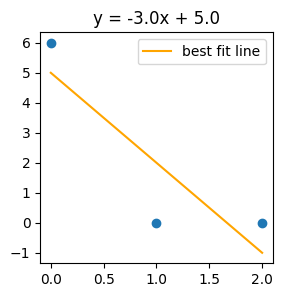

In [94]:
A = np.array([[0,1],
              [1,1],
              [2,1]])
b = np.array([6,0,0])

# A has linearly independent columns so compute x hat using the following reformulation
# of the normal equations:  
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
print(x_hat)


plt.figure(figsize=(3,3))
plt.scatter([0, 1, 2], [6, 0, 0])
plt.plot([i for i in range(0, 3)], [x_hat[0]*i + x_hat[1] for i in range(0, 3)], 
         label="best fit line", c="orange")
plt.title(f"y = {x_hat[0] :.1f}x + {x_hat[1] :.1f}")
plt.legend()
plt.show()

Again, the least-squares solution minimizes the residual sum of squares, or the sum of squared entries of vector $b - A\hat{X}$.  
In this scenario, that corresponds graphically to minimizing the vertical distance between each point and the line of best fit.  

## The General Linear Model
_Linear Algerba and its Applications, pg. 373._  

For some applications, we may want to fit our data points with something other than a straight line.  
In general, we still want to solve the matrix equation $X\beta = y$ while minimizing the sum of the squared residuals. Statisticians write the residual vector as $\epsilon = y - X\beta$, and thus express the outcome variable as $y = X\beta + \epsilon$.
- Any equation of this form is a "linear model".  

When fitting general curves, we want to find a function $y = f(x) = \beta_1g_1(x) + \beta_2g_2(x) + ... + \beta_mg_m(x)$ that best approximates our data (x,y), where functions $g_m$ are fixed, known functions of $x$ and the $\beta$ are parameters to be solved for. The $g_m(x)$ can be any kind of function, since once they are evaluated they become scalars and we can find the least-squares solution that minimizes the sum of the squares of the vertical distances between the graph of $y = f(x)$ and our original data points. As noted in [Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/least-squares.html), the method of least squares was invented by Gauss to find a best-fit ellipse.  
Therefore, we will still be solving the matrix equation $X\beta = y$, but the specific form of $X$ will be changing.  
- After transforming $X$, we still solve our normal equations $X^TX\beta = X^Ty$ for $\beta$  
- And if $X$ is invertible, we can always use $\hat{\beta} = (X^TX)^{-1}X^Ty$  
    - Recall that $X$ will be invertible if its columns are orthogonal, and we have tricks that can help us produce orthogonal columns (Gram-Schmidt for example).  

Some examples:  
We could fit a polynomial function of x to be as close to the data as possible by using an equation of the form $y = \beta_0 + \beta_1 x + \beta_2 x^2$, and thus solving the system of equations:  
$y_1 = \beta_0 + \beta_1 x_1 + \beta_2 x_2^2 + \epsilon_1$  
$y_2 = \beta_0 + \beta_1 x_1 + \beta_2 x_2^2 + \epsilon_2$    
...  
$y_n = \beta_0 + \beta_1 x_1 + \beta_2 x_2^2 + \epsilon_n$,  
- We can write this in matrix notation as $y = X \beta + \epsilon$  
- $X$ is the matrix whose columns are [$1, x, x^2$]   

Another common scenario is "multiple regression", in which we want to model an outcome variable as a function of multiple inputs.  
We could use the simple equation $y = \beta_0 + \beta_1 u + \beta_2 v$ or a more general equation $y = \beta_0 + \beta_1 u + \beta_2 v + \beta_3 u^2 + \beta_4 uv + \beta_5 v^2$.  
We can write this as $y = X\beta + \epsilon$ where $X$ has the columns [$1, u, v$] in the simple case and [$1, u, v, u^2, uv, v^2$] in the other.  
- Note that, for the simple case, we can imagine a graph in $\R^3$ with $u$ and $v$ forming a horizontal 2-D plane and $y$ being the vertical axis. Each point displays $y$ as a function of $u$ and $v$ - ie, $y = f(u,v)$. Our least-squares approximation of this data is a least-squares plane that minimizes the vertical distances from the oberved $y$ to the plane.  





### Some code examples

Calculating orthogonal projections of $y$ onto $Col(X)$, and calculating $\beta$ for the linear model $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

In [3]:
# Generate some random data - sample size of 5, with 2 input features and a target y
X = np.random.rand(5,2)
y = np.random.rand(5)

# compose some of the transformations, not quite H though
M = np.linalg.inv(X.T @ X) @ X.T
# one more matrix multiplication makes this the hat / projection matrix
H = X @ M

# compute y_hat - orthogonally project y onto the column space of X
y_hat = H @ y
# calculate the betas / coefficients
betas = M @ y

print(f"y_hat: fitted values produced by the hat matrix\n\t{y_hat}")
print(f"betas: the fitted parameters of the model\n\t{betas}")
print(f"X @ betas: fitted values produced by inputting X into the fit model\n\t{X @ betas}" )

y_hat: fitted values produced by the hat matrix
	[0.09719569 0.40254417 0.03624774 0.47811664 0.42241259]
betas: the fitted parameters of the model
	[-0.06731001  0.59008736]
X @ betas: fitted values produced by inputting X into the fit model
	[0.09719569 0.40254417 0.03624774 0.47811664 0.42241259]


Using some real data, and comparing manual results with a popular statistics/machine learning package, sklearn:

In [4]:
diabetes = load_diabetes()

# now with some real data
X = diabetes["data"]
y = diabetes["target"]
betas = (np.linalg.inv(X.T @ X) @ X.T) @ y
print(f"Manually computed betas:\n\t{betas}")

m = linear_model.LinearRegression()
m.fit(X, y)
m.coef_
print(f"Skearn computed betas:\n\t{m.coef_}")

Manually computed betas:
	[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Skearn computed betas:
	[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


future reading:  
- https://socialsciences.mcmaster.ca/jfox/Books/Companion/appendices/Appendix-Robust-Regression.pdf